# Filtering regional maxima

### Dr. Tirthajyoti Sarkar, Fremont, CA 94536, June 2019

Here, we use morphological reconstruction to create a background image, which can be subtracted from the original image to **isolate bright features (regional maxima).**

First we try reconstruction by dilation starting at the edges of the image. We initialize a seed image to the minimum intensity of the image, and set its border to be the pixel values in the original image. These maximal pixels will get dilated in order to reconstruct the background image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

### Original image

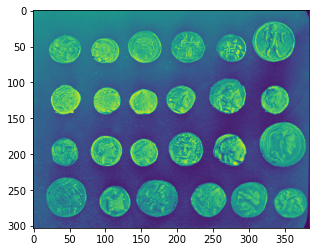

In [2]:
image = data.coins()
plt.imshow(image)
plt.show()

### Floating point conversion and Gaussian filtering

In [3]:
# Convert to float: Important for subtraction later which won't work with uint8
float_image = img_as_float(image)
filtered_image = gaussian_filter(float_image, 1)

### Reconstruction after seeding with the minimum pixel value

In [4]:
seed = np.copy(filtered_image)
seed[1:-1, 1:-1] = filtered_image.min()
mask = filtered_image

In [5]:
dilated = reconstruction(seed, mask, method='dilation')

### Show images side by side in grayscale

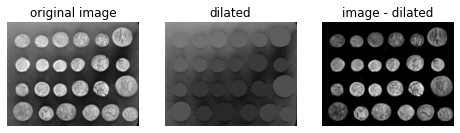

In [6]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3,figsize=(8, 2.5),sharex=True,sharey=True)

ax0.imshow(filtered_image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=filtered_image.min(), vmax=filtered_image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(filtered_image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

plt.show()

### Using a different seed value for masking

Although the features (i.e. the coins) are clearly isolated, the coins surrounded by a bright background in the original image are dimmer in the subtracted image. We can attempt to correct this using a different seed image.

Instead of creating a seed image with maxima along the image border, we can use the features of the image itself to seed the reconstruction process. Here, the seed image is the original image minus a fixed value

In [7]:
h = 0.4
seed = filtered_image - h
dilated = reconstruction(seed, mask, method='dilation')
hdome = filtered_image - dilated

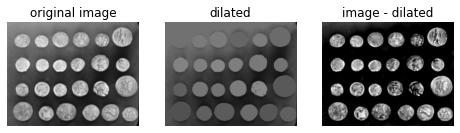

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3,figsize=(8, 2.5),sharex=True,sharey=True)

ax0.imshow(filtered_image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=filtered_image.min(), vmax=filtered_image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(hdome, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

plt.show()